<a href="https://www.kaggle.com/code/gabkgonzales/credit-risk-eda?scriptVersionId=208505286" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## **Análise de Dados de Risco de Crédito**
### **Objetivo**
Investigar padrões nos dados de empréstimos para compreender os fatores associados à inadimplência (`default`). O objetivo principal é fornecer insights que ajudem a tomar decisões sobre políticas de crédito e gerenciamento de risco.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/kaggle/input/credit-risk/credit.csv')

In [3]:
df.head()

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
0,< 0 DM,6,critical,furniture/appliances,1169,unknown,> 7 years,4,4,67,none,own,2,skilled,1,yes,no
1,1 - 200 DM,48,good,furniture/appliances,5951,< 100 DM,1 - 4 years,2,2,22,none,own,1,skilled,1,no,yes
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 years,2,3,49,none,own,1,unskilled,2,no,no
3,< 0 DM,42,good,furniture/appliances,7882,< 100 DM,4 - 7 years,2,4,45,none,other,1,skilled,2,no,no
4,< 0 DM,24,poor,car,4870,< 100 DM,1 - 4 years,3,4,53,none,other,2,skilled,2,no,yes


### Overview

In [4]:
print("\n Shape:", df.shape)
print("\n Tipos das Colunas \n \n:", df.dtypes)
print("\n Valores ausentes: \n \n", df.isnull().sum())
print("\n Estatísticas Descritivas: \n \n", df.describe())


 Shape: (1000, 17)

 Tipos das Colunas 
 
: checking_balance        object
months_loan_duration     int64
credit_history          object
purpose                 object
amount                   int64
savings_balance         object
employment_duration     object
percent_of_income        int64
years_at_residence       int64
age                      int64
other_credit            object
housing                 object
existing_loans_count     int64
job                     object
dependents               int64
phone                   object
default                 object
dtype: object

 Valores ausentes: 
 
 checking_balance        0
months_loan_duration    0
credit_history          0
purpose                 0
amount                  0
savings_balance         0
employment_duration     0
percent_of_income       0
years_at_residence      0
age                     0
other_credit            0
housing                 0
existing_loans_count    0
job                     0
dependents              0


In [5]:
df.sample()

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
341,< 0 DM,21,good,furniture/appliances,3599,< 100 DM,4 - 7 years,1,4,26,none,rent,1,unskilled,1,no,no


In [6]:
default_yes = df[df['default'] == 'yes']
default_no = df[df['default'] == 'no']

In [7]:
# clientes adimplentes

default_no.describe()

,months_loan_duration,amount,percent_of_income,years_at_residence,age,existing_loans_count,dependents
count,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,19.207143,2985.457143,2.920000,2.842857,36.224286,1.424286,1.155714
std,11.079564,2401.472278,1.128078,1.108373,11.381145,0.584721,0.362844
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1375.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,18.000000,2244.000000,3.000000,3.000000,34.000000,1.000000,1.000000
75%,24.000000,3634.750000,4.000000,4.000000,42.250000,2.000000,1.000000
max,60.000000,15857.000000,4.000000,4.000000,75.000000,4.000000,2.000000


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


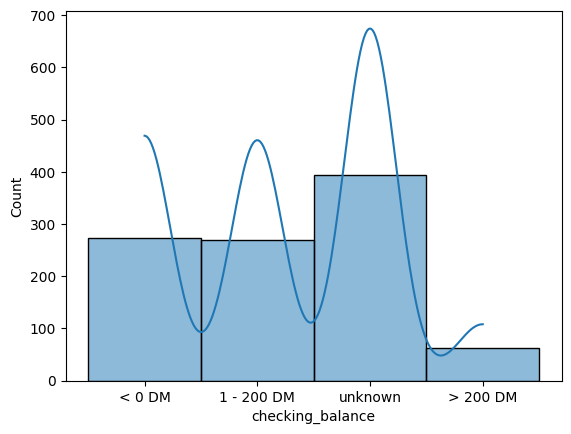

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


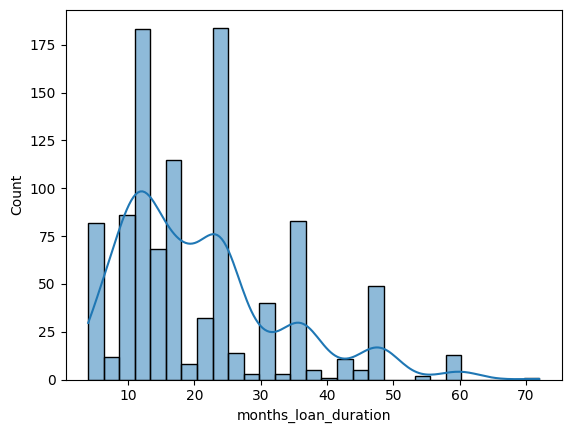

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


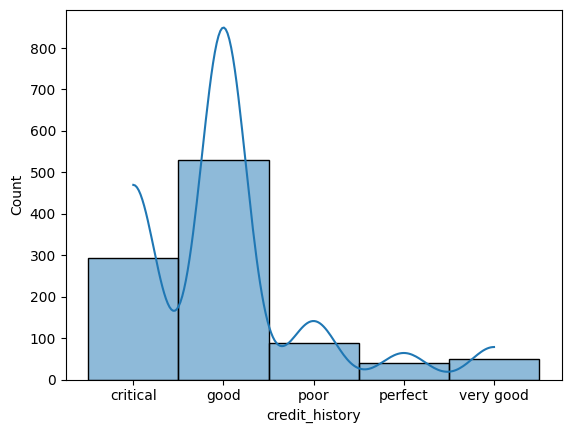

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


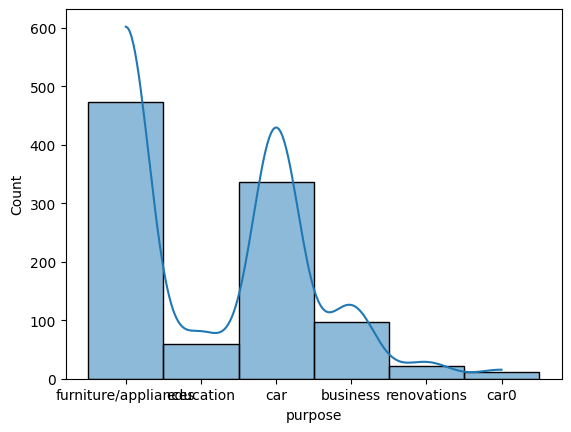

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


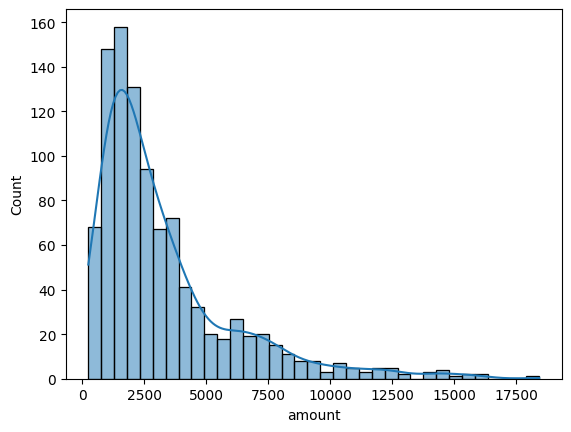

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


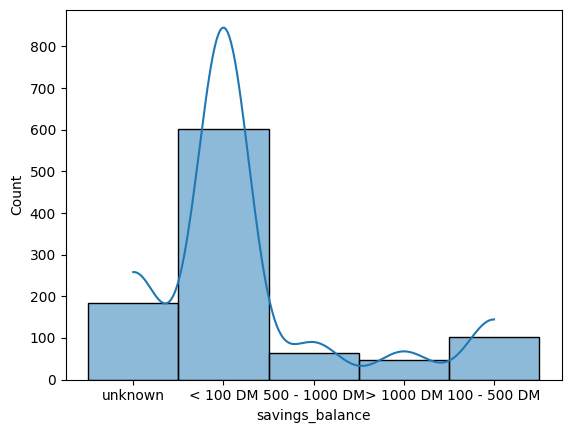

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


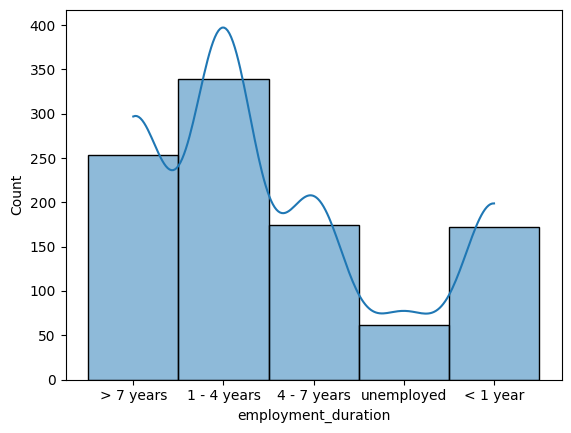

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


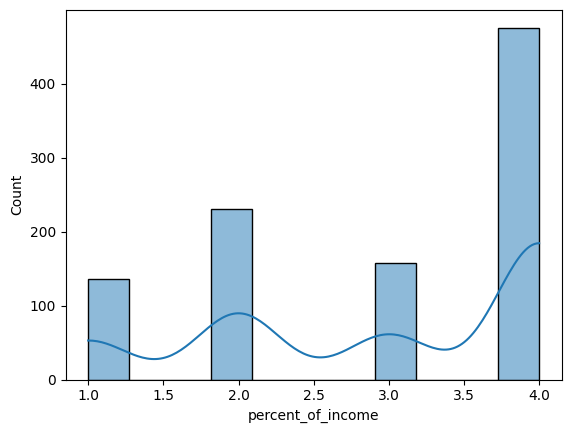

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


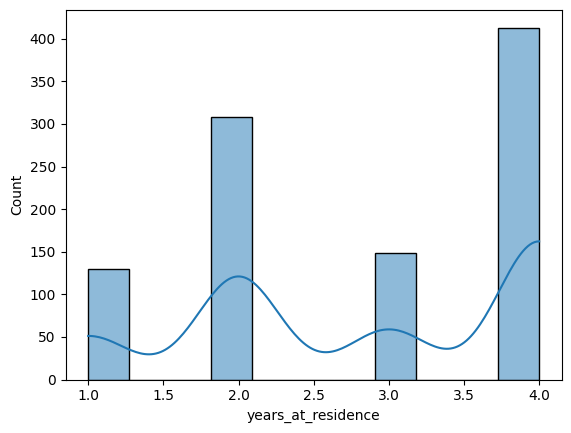

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


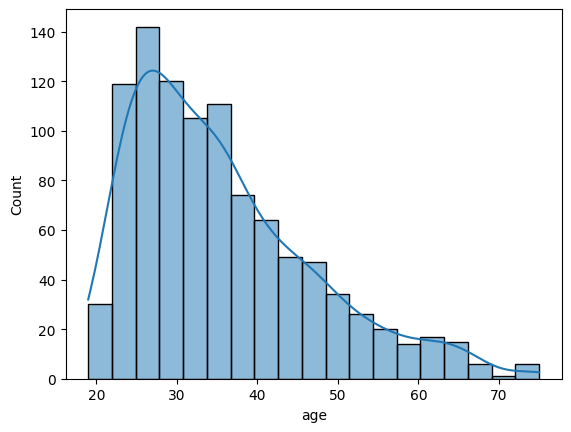

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


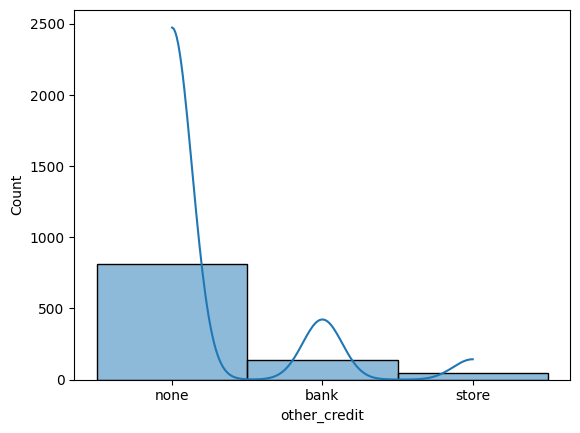

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


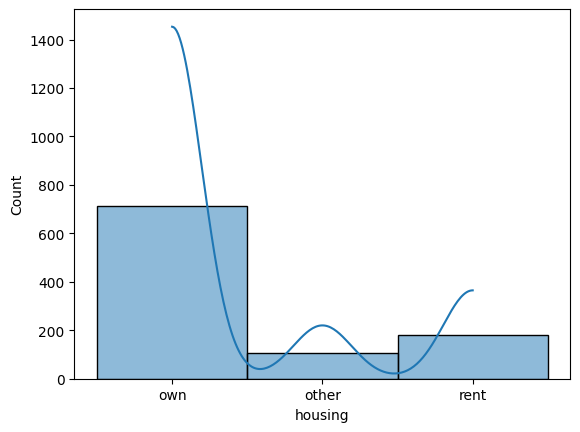

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


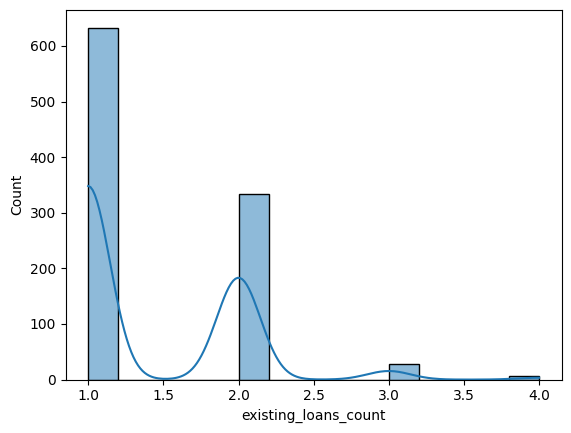

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


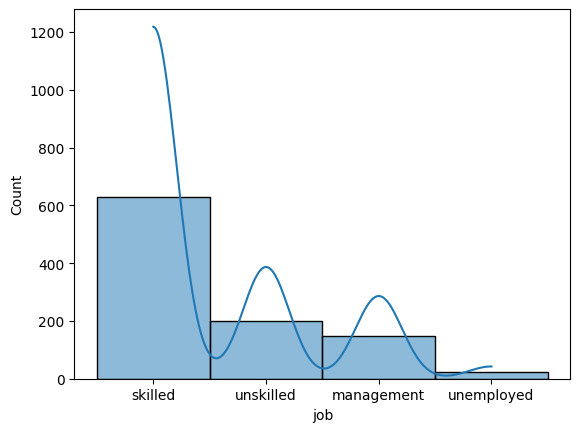

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


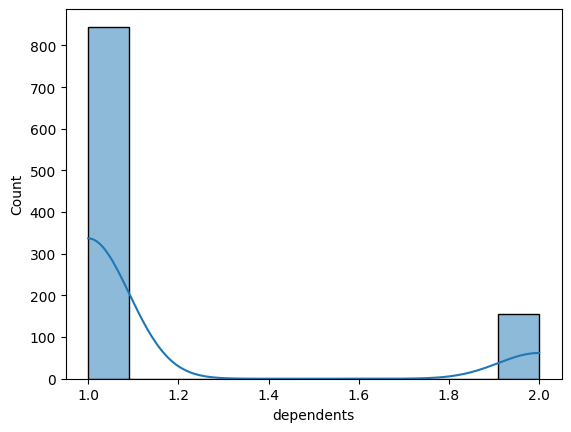

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


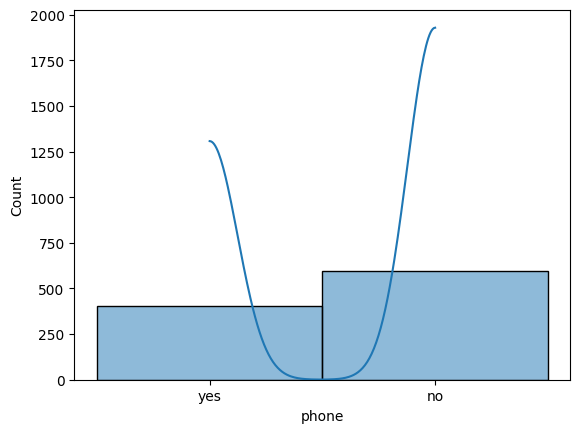

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


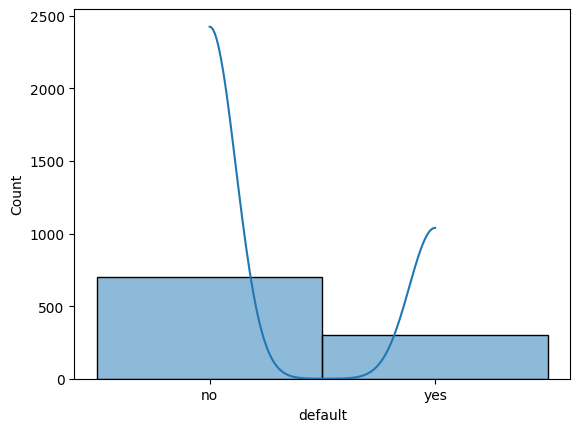

In [8]:
for col in df:
    sns.histplot(x=col,data=df,kde=True)
    plt.show()

In [9]:
#for col in df:
    #if df[col].dtype == 'O':
        #sns.countplot(x=col,data=df)
        #plt.show()

### Para clientes não Inadimplentes:


In [10]:
df_no_default = df[df['default'] == 'no']

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


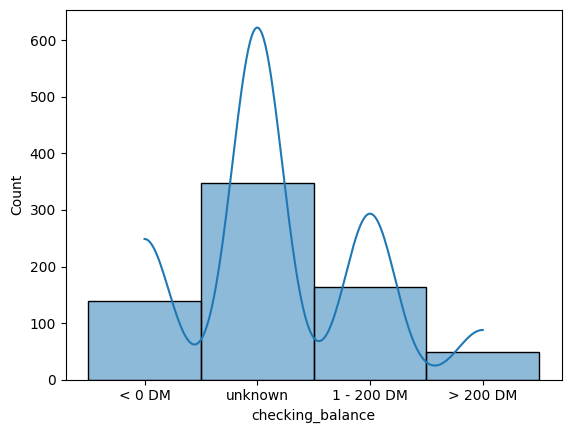

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


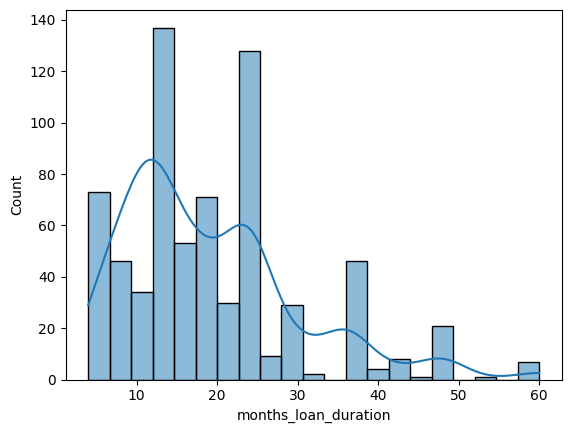

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


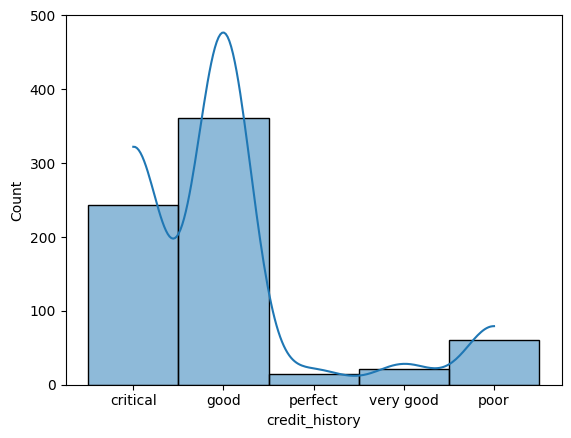

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


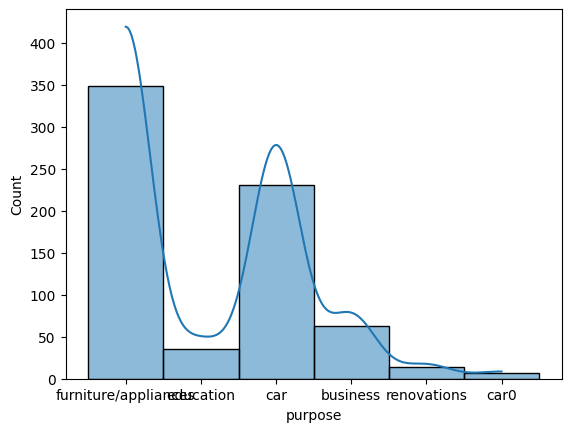

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


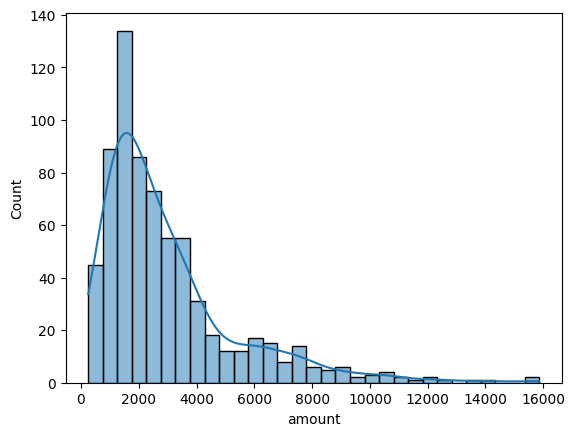

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


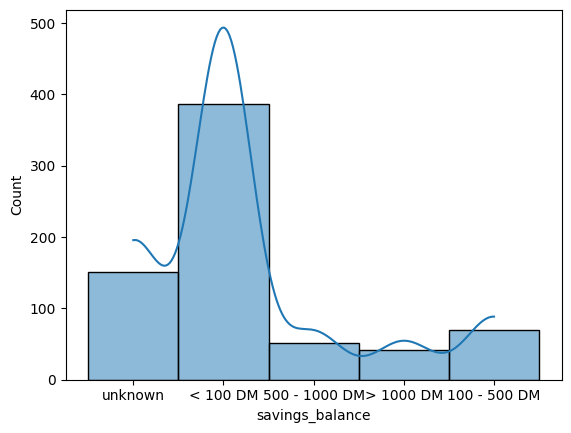

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


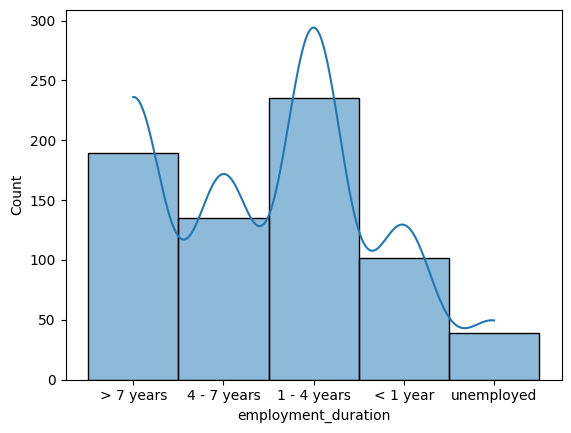

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


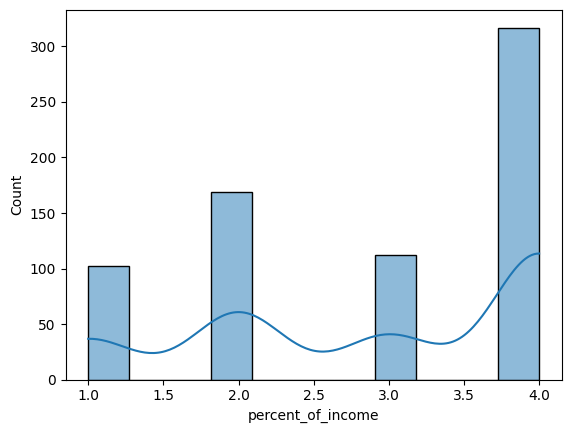

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


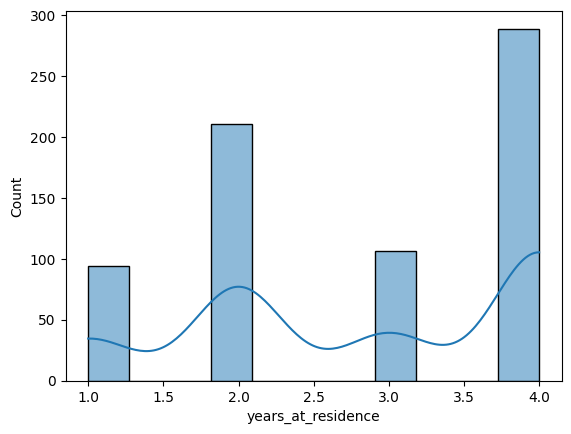

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


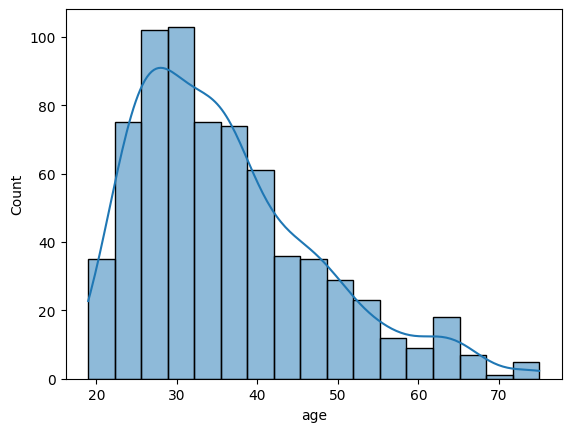

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


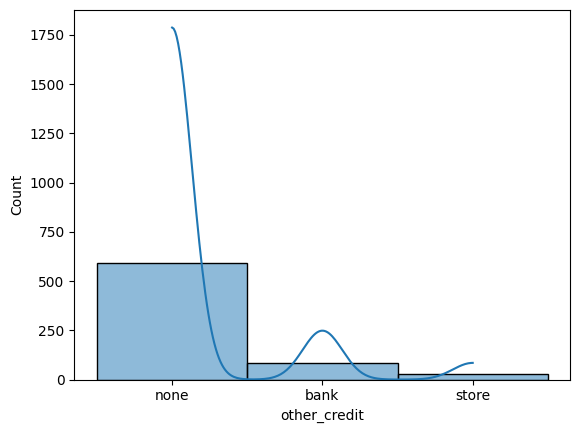

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


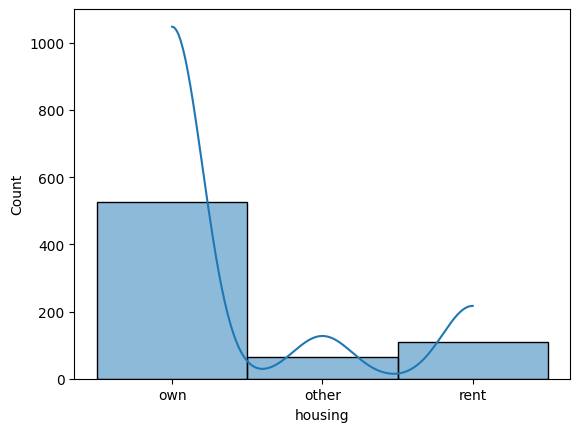

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


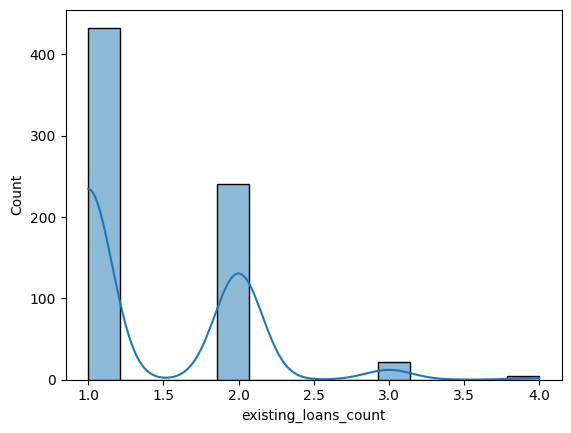

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


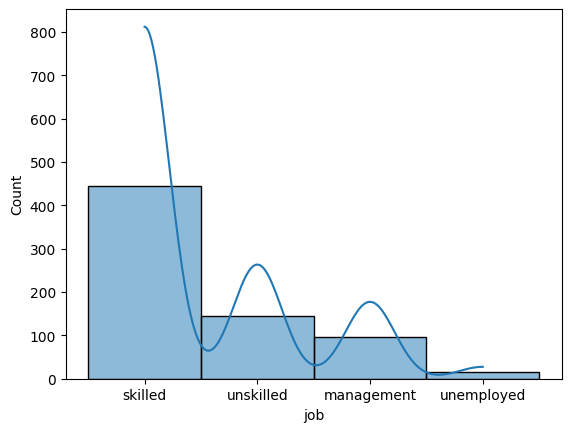

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


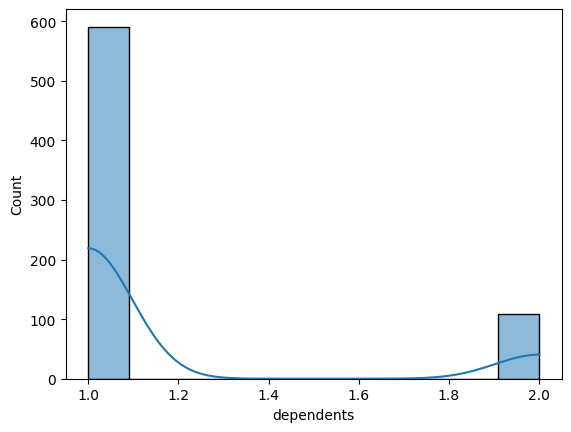

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


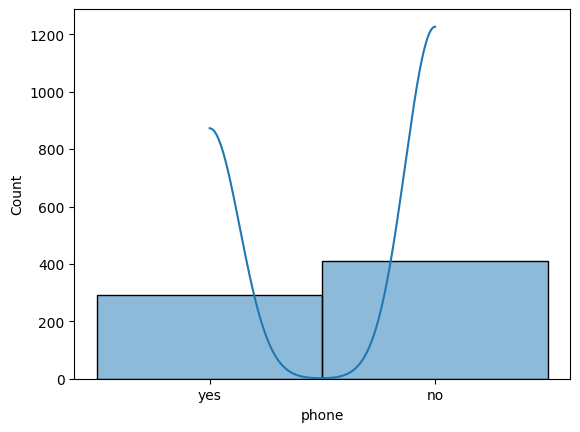

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


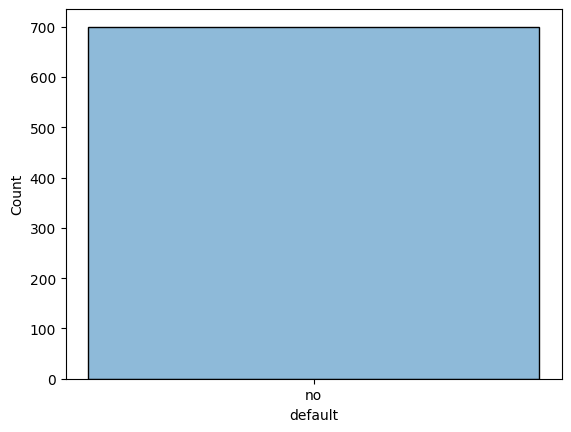

In [11]:
for col in df_no_default:
    sns.histplot(x=col,data=df_no_default,kde=True)
    plt.show()


In [12]:
#for col in df_no_default:
    #if df[col].dtype == 'O':
        #sns.countplot(x=col,data=df_no_default)
        #plt.show() 

### Porcentagens

In [13]:
important_variables = ['job', 'credit_history', 'housing', 'checking_balance', 'savings_balance',
                      'employment_duration', 'phone', 'purpose']

percentages_no_default = {}
for var in important_variables:
    percentages_no_default[var] = df_no_default[var].value_counts(normalize=True) * 100

# Exibindo as porcentagens para cada variável
for var, percentages in percentages_no_default.items():
    print(f"\nPorcentagens para {var} (Não Inadimplentes):\n\n{percentages}")



Porcentagens para job (Não Inadimplentes):

job
skilled       63.428571
unskilled     20.571429
management    13.857143
unemployed     2.142857
Name: proportion, dtype: float64

Porcentagens para credit_history (Não Inadimplentes):

credit_history
good         51.571429
critical     34.714286
poor          8.571429
very good     3.000000
perfect       2.142857
Name: proportion, dtype: float64

Porcentagens para housing (Não Inadimplentes):

housing
own      75.285714
rent     15.571429
other     9.142857
Name: proportion, dtype: float64

Porcentagens para checking_balance (Não Inadimplentes):

checking_balance
unknown       49.714286
1 - 200 DM    23.428571
< 0 DM        19.857143
> 200 DM       7.000000
Name: proportion, dtype: float64

Porcentagens para savings_balance (Não Inadimplentes):

savings_balance
< 100 DM         55.142857
unknown          21.571429
100 - 500 DM      9.857143
500 - 1000 DM     7.428571
> 1000 DM         6.000000
Name: proportion, dtype: float64

Porcentage

### Para clientes Inadimplentes:

In [14]:
df_yes_default = df[df['default'] == 'yes']

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


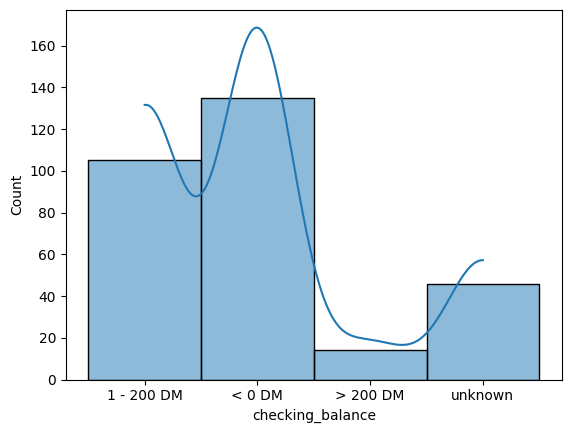

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


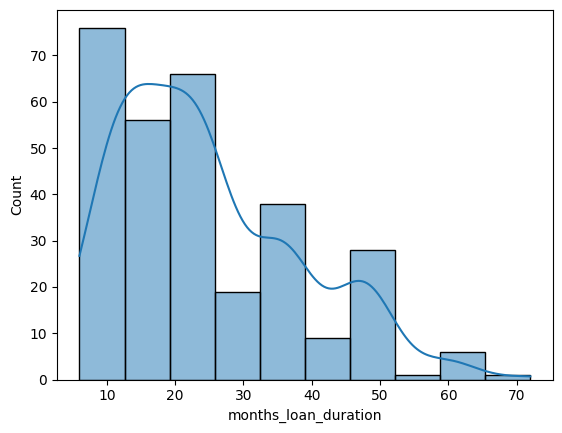

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


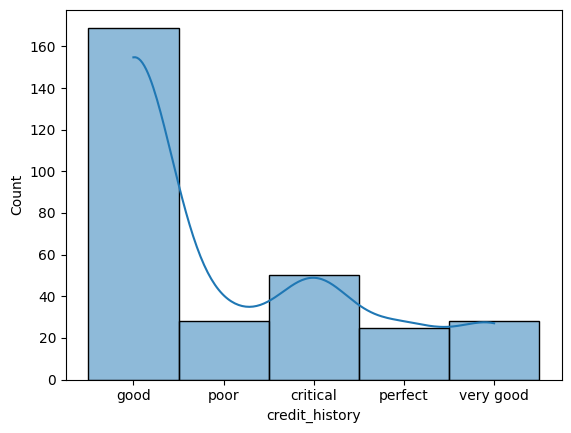

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


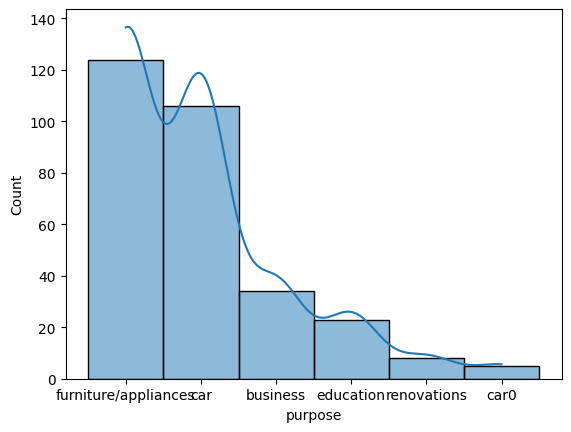

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


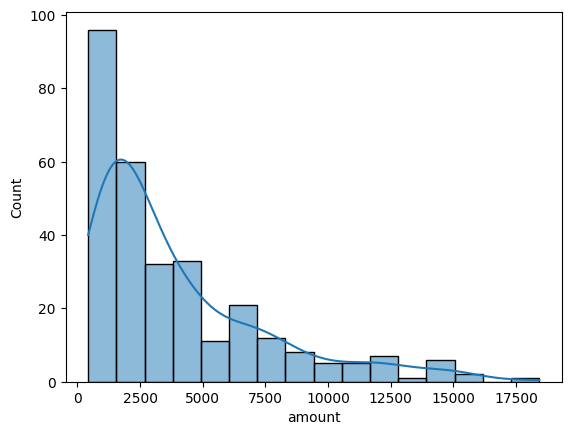

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


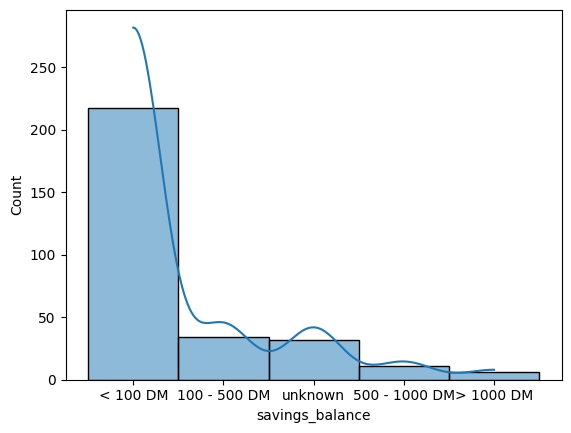

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


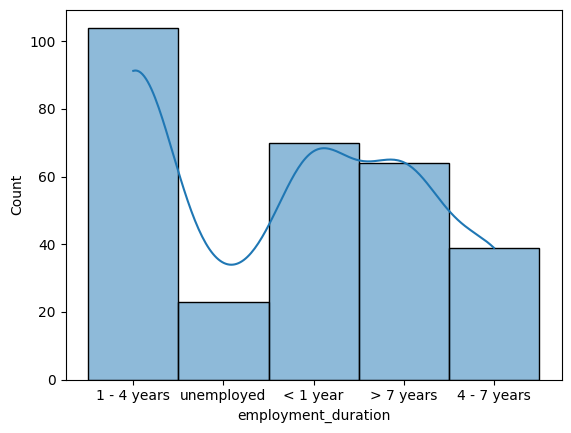

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


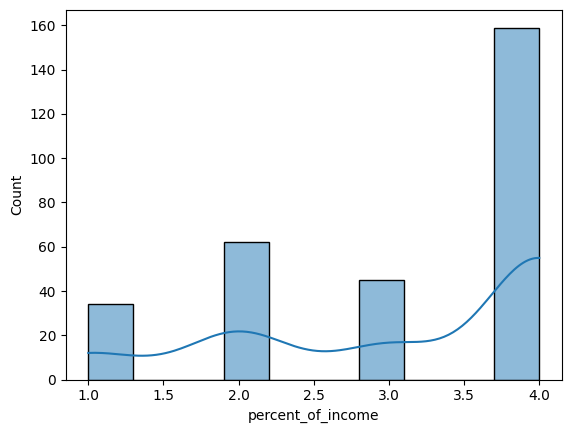

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


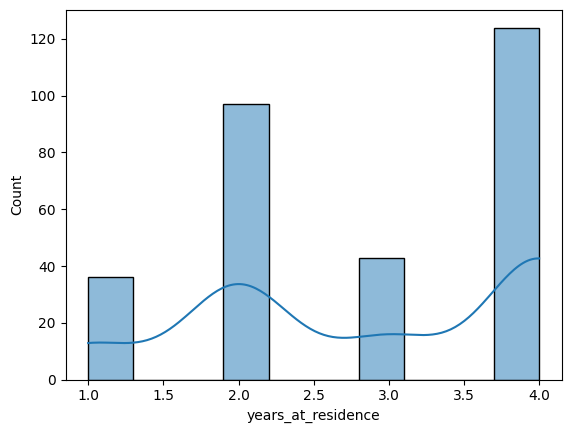

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


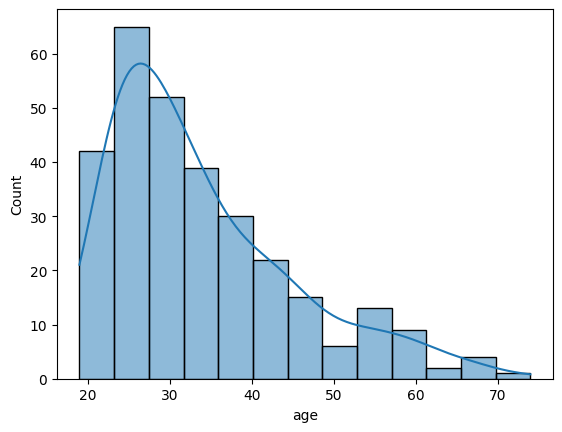

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


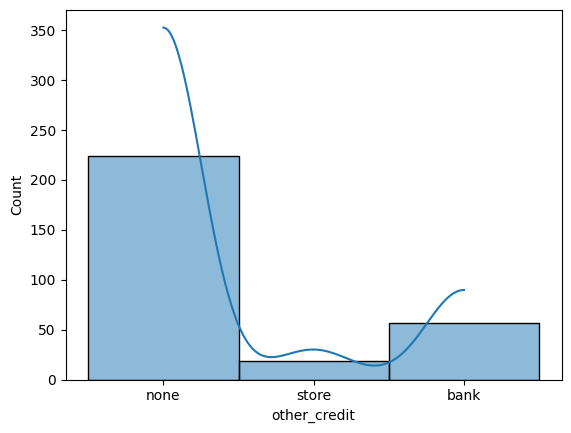

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


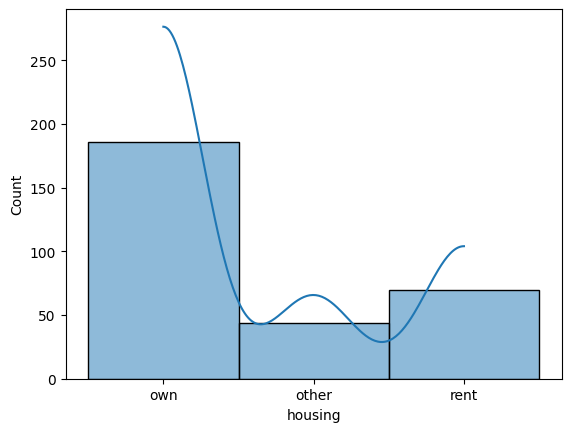

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


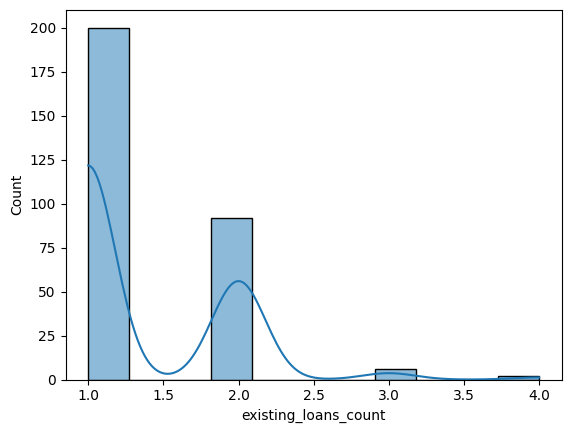

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


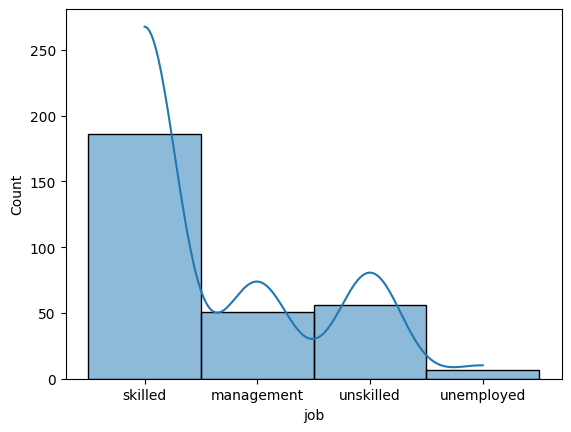

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


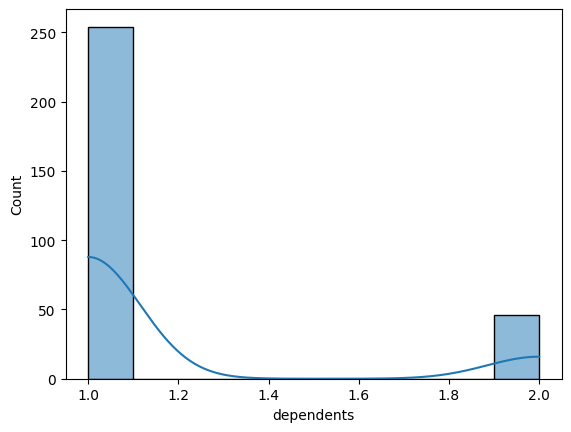

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


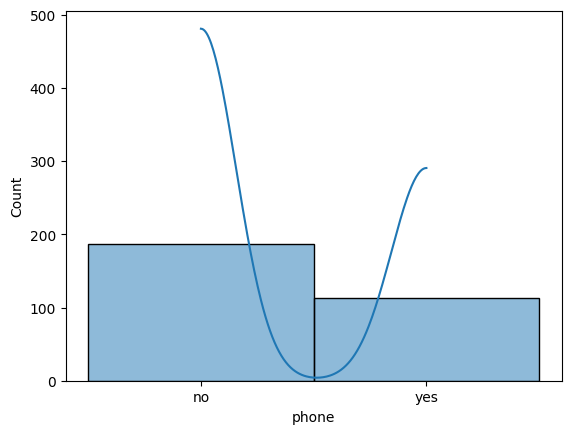

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


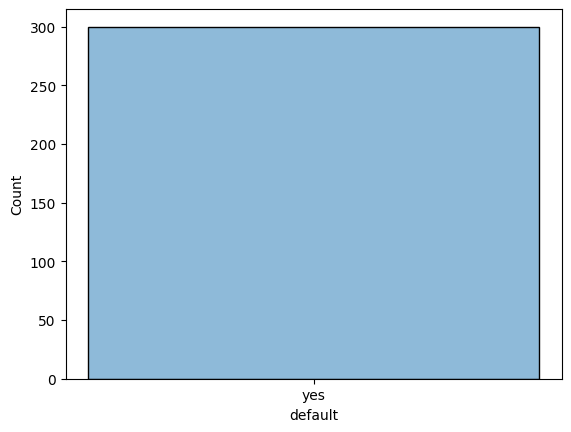

In [15]:
for col in df_yes_default:
    sns.histplot(x=col,data=df_yes_default,kde=True)
    plt.show()

In [16]:
#for col in df_yes_default:
    #if df[col].dtype == 'O':
        #sns.countplot(x=col,data=df_yes_default)
        #plt.show()

### Comparativos

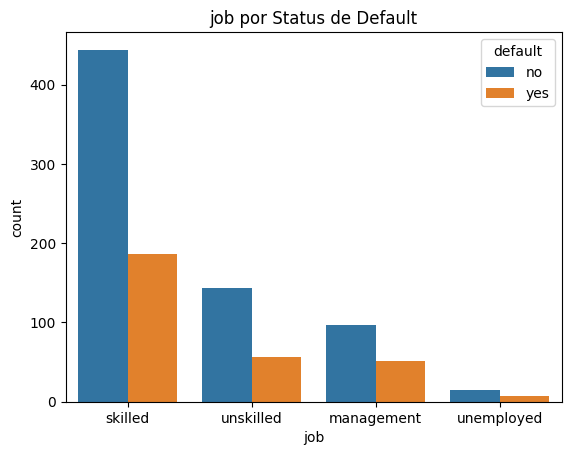

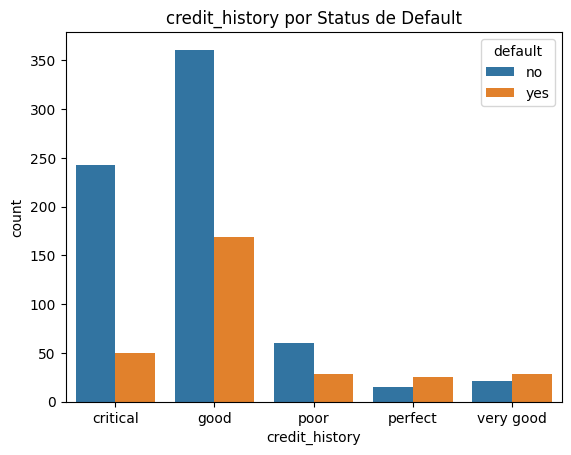

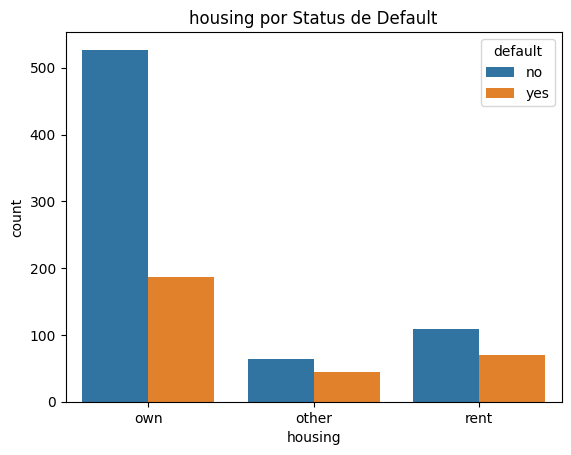

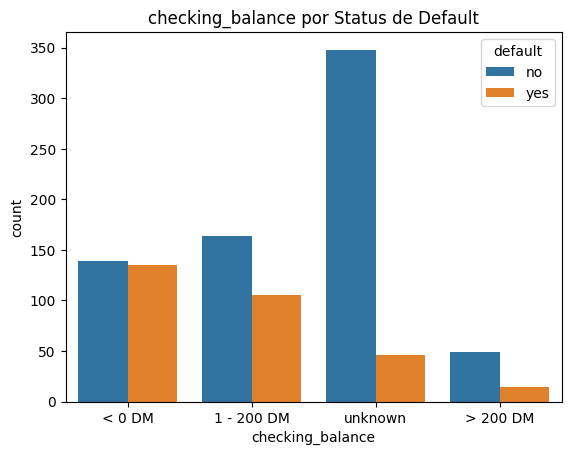

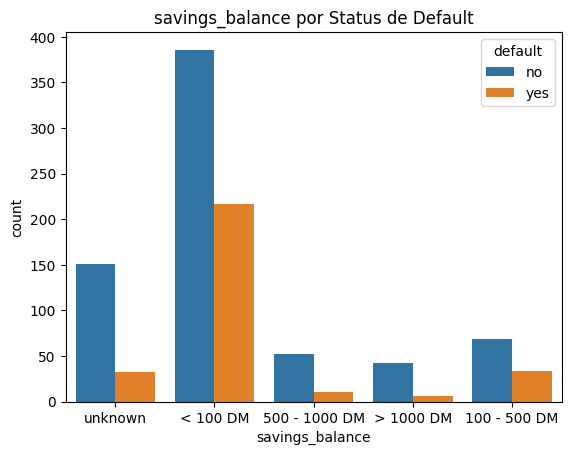

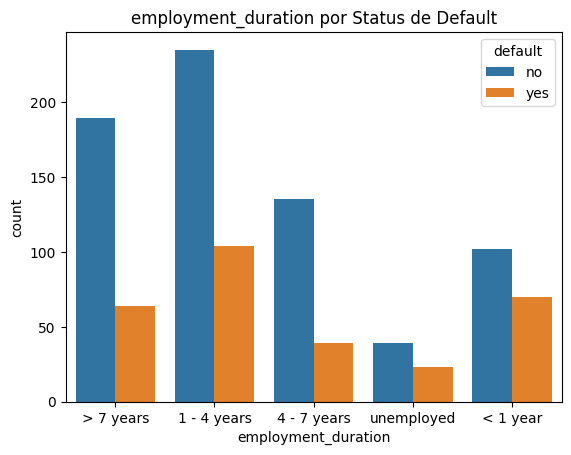

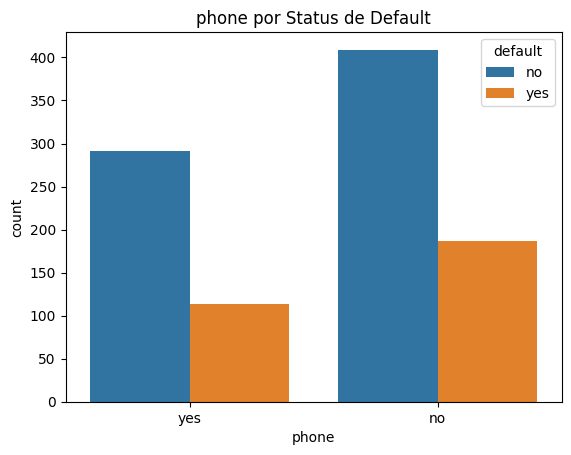

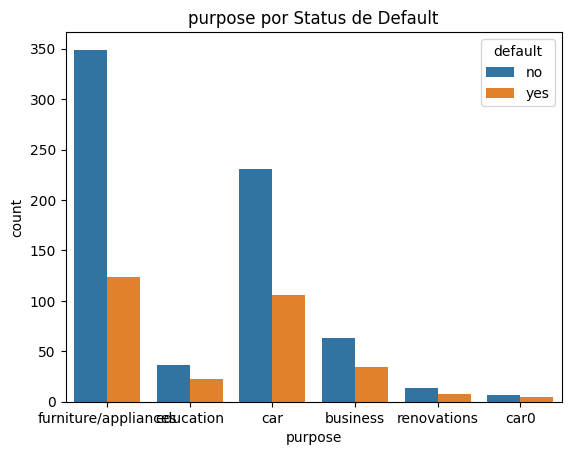

In [17]:
# Comparativos
categorical_vars = ['job', 'credit_history', 'housing', 'checking_balance', 'savings_balance',
                      'employment_duration', 'phone', 'purpose']

# ['credit_history', 'housing', 'job']

# Gráficos de barras comparativos
for var in categorical_vars:
    sns.countplot(x=var, hue='default', data=df)
    plt.title(f'{var} por Status de Default')
    plt.show()


In [18]:
percentages_yes_default = {}
for var in important_variables:
    percentages_yes_default[var] = df_yes_default[var].value_counts(normalize=True) * 100

# Exibindo as porcentagens para cada variável
for var, percentages in percentages_yes_default.items():
    print(f"\nPorcentagens para {var} (Inadimplentes):\n\n{percentages}")



Porcentagens para job (Inadimplentes):

job
skilled       62.000000
unskilled     18.666667
management    17.000000
unemployed     2.333333
Name: proportion, dtype: float64

Porcentagens para credit_history (Inadimplentes):

credit_history
good         56.333333
critical     16.666667
poor          9.333333
very good     9.333333
perfect       8.333333
Name: proportion, dtype: float64

Porcentagens para housing (Inadimplentes):

housing
own      62.000000
rent     23.333333
other    14.666667
Name: proportion, dtype: float64

Porcentagens para checking_balance (Inadimplentes):

checking_balance
< 0 DM        45.000000
1 - 200 DM    35.000000
unknown       15.333333
> 200 DM       4.666667
Name: proportion, dtype: float64

Porcentagens para savings_balance (Inadimplentes):

savings_balance
< 100 DM         72.333333
100 - 500 DM     11.333333
unknown          10.666667
500 - 1000 DM     3.666667
> 1000 DM         2.000000
Name: proportion, dtype: float64

Porcentagens para employment_d

### **Relatório de Conclusão**
A análise de porcentagens para as variáveis importantes em clientes **inadimplentes** e **não inadimplentes** revelou padrões distintos que podem ser utilizados para responder a perguntas de negócios e orientar decisões estratégicas.

---

### **1. Perguntas de Negócio e Respostas**

#### **1.1. Como o tipo de trabalho (`job`) impacta a inadimplência?**
- **Clientes Não Inadimplentes**:
  - A maioria é composta por trabalhadores **skilled** (63.43%), seguidos de **unskilled** (20.57%) e **management** (13.86%).
  - Apenas 2.14% dos não inadimplentes são **unemployed**.
- **Clientes Inadimplentes**:
  - A proporção de trabalhadores **skilled** permanece alta (62.0%), mas há um aumento em **management** (17.0%) e uma pequena diferença em **unskilled** (18.67%).
  - **Unemployed** representam apenas 2.33% dos inadimplentes.

**Conclusão**:
- Embora **skilled** seja a categoria dominante em ambos os grupos, a presença de trabalhadores em **management** é maior entre inadimplentes, indicando que clientes dessa categoria podem precisar de maior avaliação de risco.

---

#### **1.2. O histórico de crédito (`credit_history`) influencia o risco de inadimplência?**
- **Clientes Não Inadimplentes**:
  - A maior parte possui histórico **good** (51.57%) ou **critical** (34.71%), enquanto históricos **perfect** (2.14%) e **very good** (3.0%) são pouco comuns.
- **Clientes Inadimplentes**:
  - A categoria **good** também é dominante (56.33%), mas a proporção de clientes com histórico **critical** cai drasticamente (16.67%).
  - Históricos **perfect** (8.33%) e **very good** (9.33%) têm maior representação entre inadimplentes.

**Conclusão**:
- Clientes com histórico **perfect** ou **very good** são mais representados entre inadimplentes do que entre não inadimplentes, o que pode parecer contraintuitivo. Isso sugere que outros fatores, como empréstimos maiores ou menor capacidade de pagamento, podem contribuir para a inadimplência nesses grupos.

---

#### **1.3. A situação de habitação (`housing`) está relacionada ao status de default?**
- **Clientes Não Inadimplentes**:
  - A maioria possui casa própria (**own**, 75.29%), com menor proporção em **rent** (15.57%) e **other** (9.14%).
- **Clientes Inadimplentes**:
  - Embora **own** continue dominante (62.0%), há um aumento nas categorias **rent** (23.33%) e **other** (14.67%).

**Conclusão**:
- Clientes que vivem em imóveis alugados (**rent**) ou outras condições (**other**) têm maior probabilidade de inadimplência, sugerindo menor estabilidade financeira ou maior carga de despesas fixas.

---

#### **1.4. Qual o impacto do saldo em conta corrente (`checking_balance`) na inadimplência?**
- **Clientes Não Inadimplentes**:
  - A maior parte tem saldo **unknown** (49.71%), seguido de **1 - 200 DM** (23.43%) e **< 0 DM** (19.86%).
- **Clientes Inadimplentes**:
  - A categoria **< 0 DM** é dominante (45.0%), seguida de **1 - 200 DM** (35.0%), enquanto **unknown** cai para 15.33%.

**Conclusão**:
- Clientes com saldo negativo (**< 0 DM**) ou baixo (**1 - 200 DM**) têm maior risco de inadimplência, o que reflete a importância do saldo em conta corrente como um indicador de estabilidade financeira.

---

#### **1.5. A poupança (`savings_balance`) pode prever a inadimplência?**
- **Clientes Não Inadimplentes**:
  - A maioria possui saldo **< 100 DM** (55.14%), enquanto categorias mais altas (**> 1000 DM**, **500 - 1000 DM**) têm representação menor.
- **Clientes Inadimplentes**:
  - A proporção de clientes com saldo **< 100 DM** aumenta para 72.33%, e categorias de saldos mais altos praticamente desaparecem (**> 1000 DM** com apenas 2.0%).

**Conclusão**:
- Clientes com baixa poupança (**< 100 DM**) são mais propensos à inadimplência, destacando a importância da poupança como um amortecedor financeiro.

---


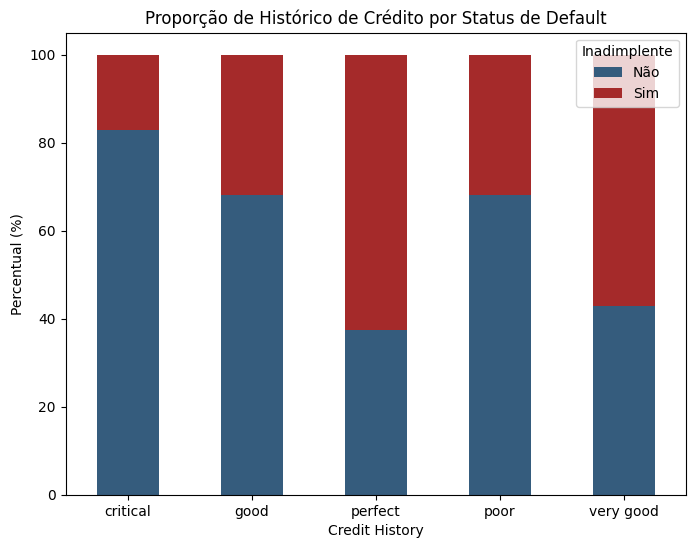

In [19]:
credit_proportions = pd.crosstab(df['credit_history'], df['default'], normalize='index') * 100
credit_proportions.plot(kind='bar', stacked=True, figsize=(8, 6), color=['#355c7d', '#A52A2A'])
plt.title('Proporção de Histórico de Crédito por Status de Default')
plt.ylabel('Percentual (%)')
plt.xlabel('Credit History')
plt.xticks(rotation=0)
plt.legend(title='Inadimplente', labels=['Não', 'Sim'])
plt.show()


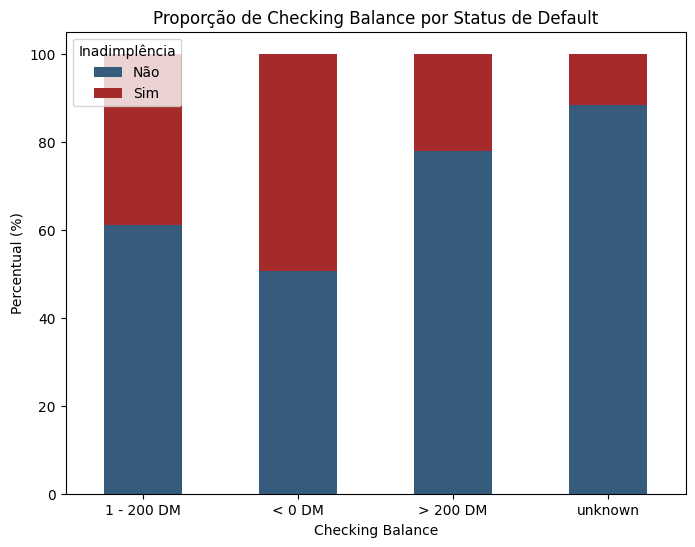

In [20]:
checking_proportions = pd.crosstab(df['checking_balance'], df['default'], normalize='index') * 100
checking_proportions.plot(kind='bar', stacked=True, figsize=(8, 6), color=['#355c7d','#A52A2A'])
plt.title('Proporção de Checking Balance por Status de Default')
plt.ylabel('Percentual (%)')
plt.xlabel('Checking Balance')
plt.xticks(rotation=0)
plt.legend(title='Inadimplência', labels=['Não', 'Sim'])
plt.show()



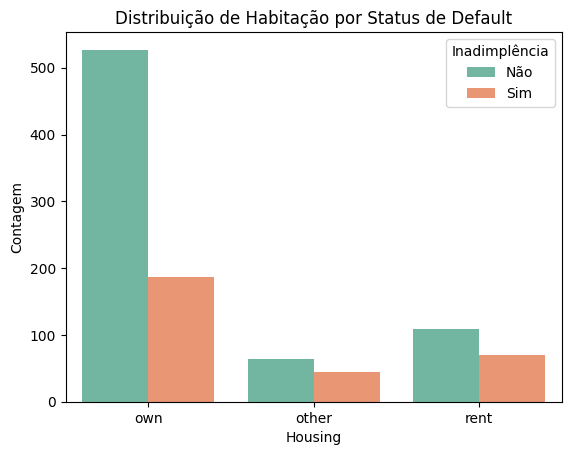

In [21]:
sns.countplot(x='housing', hue='default', data=df, palette='Set2')
plt.title('Distribuição de Habitação por Status de Default')
plt.ylabel('Contagem')
plt.xlabel('Housing')
plt.xticks(rotation=0)
plt.legend(title='Inadimplência', labels=['Não', 'Sim'])
plt.show()


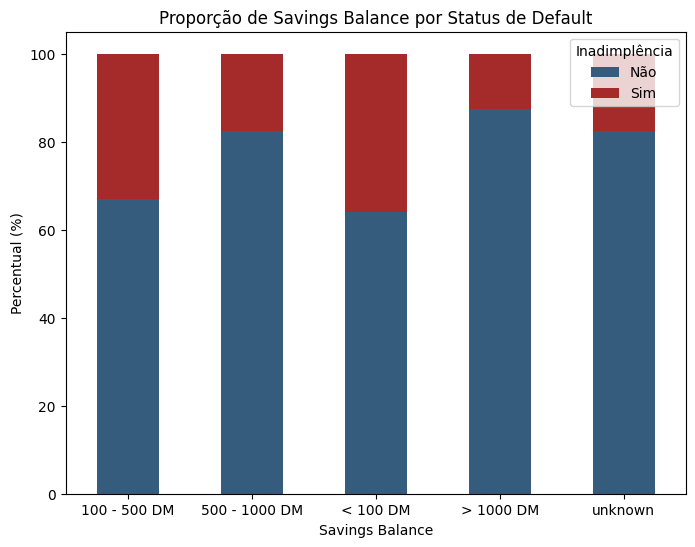

In [22]:
savings_proportions = pd.crosstab(df['savings_balance'], df['default'], normalize='index') * 100
savings_proportions.plot(kind='bar', stacked=True, figsize=(8, 6), color=['#355c7d', '#A52A2A'])
plt.title('Proporção de Savings Balance por Status de Default')
plt.ylabel('Percentual (%)')
plt.xlabel('Savings Balance')
plt.xticks(rotation=0)
plt.legend(title='Inadimplência', labels=['Não', 'Sim'])
plt.show()
